# **Grocery Sales Analysis**

In [8]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
category_csv = '/content/drive/MyDrive/Projects/grocery_sales/cleaned_dataset/category.csv'
category = pd.read_csv(category_csv)

category.head()

,categoryid,categoryname
0,1,Confections
1,2,Shell fish
2,3,Cereals
3,4,Dairy
4,5,Beverages


In [2]:
city_csv = '/content/drive/MyDrive/Projects/grocery_sales/cleaned_dataset/city.csv'
country_csv = '/content/drive/MyDrive/Projects/grocery_sales/cleaned_dataset/country.csv'
customers_csv = '/content/drive/MyDrive/Projects/grocery_sales/cleaned_dataset/customers.csv'
employee_csv = '/content/drive/MyDrive/Projects/grocery_sales/cleaned_dataset/employee.csv'
products_csv = '/content/drive/MyDrive/Projects/grocery_sales/cleaned_dataset/products.csv'
sales_csv = '/content/drive/MyDrive/Projects/grocery_sales/cleaned_dataset/sales.csv'

city = pd.read_csv(city_csv)
country = pd.read_csv(country_csv)
customers = pd.read_csv(customers_csv)
employee = pd.read_csv(employee_csv)
products = pd.read_csv(products_csv)
sales = pd.read_csv(sales_csv)

In [3]:
# customers.info()
# sales.info()
# change salesdate datatype

sales["salesdate"] = pd.to_datetime(sales["salesdate"]).dt.date



In [4]:
import numpy as np
sales.isnull().sum()

,0
salesid,0
salespersonid,0
customerid,0
productid,0
quantity,0
discount,0
totalprice,0
salesdate,0
transactionnumber,0


## __Monthly sales performance__

Calculate total sales for each month.

In [5]:
sales["month"]=pd.to_datetime(sales["salesdate"]).dt.to_period("M")
monthly_sales = pd.DataFrame(sales.groupby('month',as_index=True)['salesid'].count())

In [6]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 5 entries, 2018-01 to 2018-05
Freq: M
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   salesid  5 non-null      int64
dtypes: int64(1)
memory usage: 80.0 bytes


         salesid
month           
2018-01  1607050
2018-02  1451366
2018-03  1609190
2018-04  1556091
2018-05   534428


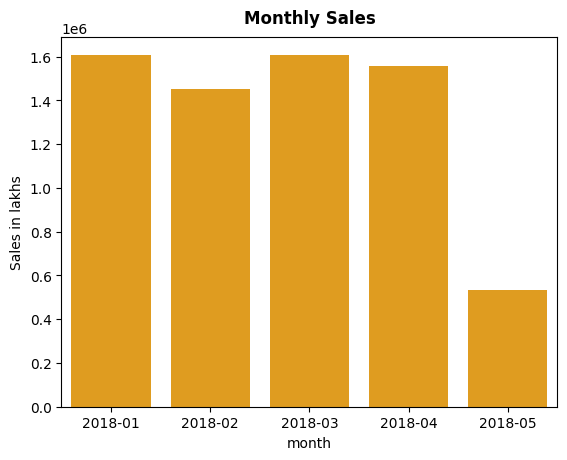

In [9]:
print(monthly_sales) #barplot
#monthly_sales = monthly_sales/1e5
# monthly_sales.index = monthly_sales.index.strftime("%b")  # To convert 01 to jan, 02 To FEB
sns.barplot(x="month",y='salesid',data=monthly_sales,color = 'orange')
plt.xlabel("month")
plt.ylabel("Sales in lakhs")
plt.title("Monthly Sales",fontweight = 'bold',pad = 10)
plt.show()

Compare sales performance across different product categories each month.

In [10]:
products.head()
sales.head()

,salesid,salespersonid,customerid,productid,quantity,discount,totalprice,salesdate,transactionnumber,month
0,11428,6,52947,442,14,0.0,1020.66,2018-04-29,Q97BYWLS0ZQC5O34Z1N2,2018-04
1,11429,20,19271,86,5,0.0,91.90,2018-03-19,M05DHK5BAHUEF6MIZ7Y9,2018-03
2,11430,20,69750,227,18,0.0,998.46,2018-02-23,9DUJ26PB2BJZ2392XGCG,2018-02
3,11431,14,92249,209,24,0.0,791.72,2018-04-01,PHWYPHGMZUOT8CMAUFEF,2018-04
4,11432,12,20657,358,6,0.0,508.27,2018-02-02,86AFD2DG2QMTQKVYLCO9,2018-02


In [11]:
df1 = pd.merge(sales,products,left_on="productid",right_on="productid",how="inner")
df2 = pd.merge(df1,category,left_on='category_id',right_on='categoryid',how="inner")
df2.head()

,salesid,salespersonid,customerid,productid,quantity,discount,totalprice,salesdate,transactionnumber,month,productname,price,category_id,class_,modifydate,resistant,isallergic,vitalitydays,categoryid,categoryname
0,11428,6,52947,442,14,0.0,1020.66,2018-04-29,Q97BYWLS0ZQC5O34Z1N2,2018-04,Wine - Ej Gallo Sierra Valley,72.9041,6,Medium,2017-12-06,Unknown,Unknown,106,6,Seafood
1,11429,20,19271,86,5,0.0,91.90,2018-03-19,M05DHK5BAHUEF6MIZ7Y9,2018-03,Longos - Grilled Chicken With,18.3791,2,Low,2018-02-28,Weak,FALSE,0,2,Shell fish
2,11430,20,69750,227,18,0.0,998.46,2018-02-23,9DUJ26PB2BJZ2392XGCG,2018-02,Cheese - Taleggio D.o.p.,55.4699,5,Low,2018-04-14,Weak,FALSE,0,5,Beverages
3,11431,14,92249,209,24,0.0,791.72,2018-04-01,PHWYPHGMZUOT8CMAUFEF,2018-04,Sugar - Fine,32.9885,3,Low,2018-01-31,Unknown,Unknown,0,3,Cereals
4,11432,12,20657,358,6,0.0,508.27,2018-02-02,86AFD2DG2QMTQKVYLCO9,2018-02,"Cheese - Boursin, Garlic / Herbs",84.7111,9,Medium,2017-09-02,Unknown,TRUE,0,9,Poultry


In [12]:
grouped = df2.groupby(["month", "category_id", "categoryname"], as_index=False)["salesid"].count()
grouped.rename(columns={"salesid": "sales_count"}, inplace=True)
grouped

,month,category_id,categoryname,sales_count
0,2018-01,1,Confections,202833
1,2018-01,2,Shell fish,127588
2,2018-01,3,Cereals,159319
3,2018-01,4,Dairy,124360
4,2018-01,5,Beverages,135012
5,2018-01,6,Seafood,127584
6,2018-01,7,Meat,177685
7,2018-01,8,Grain,99767
8,2018-01,9,Poultry,167815
9,2018-01,10,Snails,132158


In [13]:
grouped["rank"] = grouped.groupby("month")["sales_count"].rank(method="dense", ascending=False).astype(int)

In [14]:
grouped

,month,category_id,categoryname,sales_count,rank
0,2018-01,1,Confections,202833,1
1,2018-01,2,Shell fish,127588,8
2,2018-01,3,Cereals,159319,4
3,2018-01,4,Dairy,124360,10
4,2018-01,5,Beverages,135012,6
5,2018-01,6,Seafood,127584,9
6,2018-01,7,Meat,177685,2
7,2018-01,8,Grain,99767,11
8,2018-01,9,Poultry,167815,3
9,2018-01,10,Snails,132158,7


In [34]:
path = "/content/drive/MyDrive/Projects/grocery_sales/cleaned_dataset/citywise_sales.csv"
city_sales = pd.read_csv(path)
city_path = "/content/drive/MyDrive/Projects/grocery_sales/cleaned_dataset/city_lat_long.csv"
city_lat_long = pd.read_csv(city_path)

In [33]:
pd.reset_option('display.max_rows', None)

In [40]:
city_sales.drop(columns='rank',inplace=True)
city_sales

,cityid,city_name,city_sales
0,28,Tucson,75674
1,34,Fort Wayne,75130
2,58,Columbus,74902
3,81,Sacramento,74564
4,14,Indianapolis,74533
...,...,...,...
91,37,Fresno,67427
92,5,Virginia Beach,67336
93,90,Grand Rapids,67281
94,9,Atlanta,66475


In [41]:
city_sales = pd.merge(city_sales,city_lat_long,left_on="cityid",right_on='city_id',how='inner')
city_sales

,cityid,city_name_x,city_sales,city_id,city_name_y,Latitude,Longitude
0,28,Tucson,75674,28,Tucson,32.253460,-110.911789
1,34,Fort Wayne,75130,34,Fort Wayne,41.093842,-85.139236
2,58,Columbus,74902,58,Columbus,39.961180,-82.998790
3,81,Sacramento,74564,81,Sacramento,38.575764,-121.478851
4,14,Indianapolis,74533,14,Indianapolis,39.791000,-86.148003
...,...,...,...,...,...,...,...
91,37,Fresno,67427,37,Fresno,36.747700,-119.772400
92,5,Virginia Beach,67336,5,Virginia Beach,36.863140,-76.015778
93,90,Grand Rapids,67281,90,Grand Rapids,42.963795,-85.670006
94,9,Atlanta,66475,9,Atlanta,33.753746,-84.386330


In [42]:
city_sales.drop(columns=["city_id","city_name_y"],inplace=True)
city_sales.rename(columns={"cityid":"city_id","city_name_x":"city_name"},inplace=True)
city_sales.head()

,city_id,city_name,city_sales,Latitude,Longitude
0,28,Tucson,75674,32.253460,-110.911789
1,34,Fort Wayne,75130,41.093842,-85.139236
2,58,Columbus,74902,39.961180,-82.998790
3,81,Sacramento,74564,38.575764,-121.478851
4,14,Indianapolis,74533,39.791000,-86.148003


In [43]:
import folium

us_latitude = 39.8283
us_longitude = -98.5795

us_map = folium.Map(location=[us_latitude, us_longitude], zoom_start=4)

us_map


In [46]:
from folium import plugins

sales = plugins.MarkerCluster().add_to(us_map)

for lat,long,city_name,sale_value in zip(city_sales.Latitude,city_sales.Longitude,city_sales['city_name'],city_sales['city_sales']):
  popup_text= f"""
              <b>{city_name}</b>
              <br>{sale_value}</br>
              """
  folium.Marker(
      location=[lat,long],
      popup=folium.Popup(popup_text,max_width=300),
  ).add_to(sales)

us_map


In [48]:
data_path = "/content/drive/MyDrive/Projects/grocery_sales/cleaned_dataset/city_category_sales.csv"
city_category_sales = pd.read_csv(data_path)
city_category_sales

,cityid,city_name,categoryname,city_sales,rank
0,1,Dayton,Confections,8972,1
1,1,Dayton,Meat,7860,2
2,1,Dayton,Poultry,7290,3
3,1,Dayton,Cereals,7010,4
4,1,Dayton,Produce,6722,5
...,...,...,...,...,...
1051,96,Pittsburgh,Snails,5846,7
1052,96,Pittsburgh,Seafood,5633,8
1053,96,Pittsburgh,Shell fish,5593,9
1054,96,Pittsburgh,Dairy,5492,10


In [ ]:
city_category_sales = pd.merge(city_category_sales,city_lat_long,left_on='cityid',right_on='city_id',how='inner')

In [58]:
city_category_sales.drop(columns=["city_id_x","city_name_y","Latitude_x","Longitude_x","city_id_y","city_name"],inplace=True)

In [61]:

city_category_sales.rename(columns={"Latitude_y":"Latitude","Longitude_y":"Longitude"},inplace=True)
city_category_sales

,cityid,categoryname,city_sales,rank,Latitude,Longitude
0,1,Confections,8972,1,39.758949,-84.191605
1,1,Meat,7860,2,39.758949,-84.191605
2,1,Poultry,7290,3,39.758949,-84.191605
3,1,Cereals,7010,4,39.758949,-84.191605
4,1,Produce,6722,5,39.758949,-84.191605
...,...,...,...,...,...,...
1051,96,Snails,5846,7,40.440624,-79.995888
1052,96,Seafood,5633,8,40.440624,-79.995888
1053,96,Shell fish,5593,9,40.440624,-79.995888
1054,96,Dairy,5492,10,40.440624,-79.995888


In [64]:
rank = int(input("Enter the rank: "))
filtered_row_rank = city_category_sales[city_category_sales['rank'] == rank]

category_city = plugins.MarkerCluster().add_to(us_map)

for lat,long,city_name,category_,sale_value in zip(filtered_row_rank.Latitude,filtered_row_rank.Longitude,
                                                   filtered_row_rank['cityid'],filtered_row_rank['categoryname'],
                                                   filtered_row_rank['city_sales']):
  popup_text= f"""
              <b>{city_name}</b>
              <br>{category_} | {sale_value}</br>
              """
  folium.Marker(
      location=[lat,long],
      popup=folium.Popup(popup_text,max_width=300),
  ).add_to(category_city)

us_map

Enter the rank: 9


# **Author**
## Erukonda Saikiran